## Classification

In the data fitting problem of previous chapter, the goal is to reproduce or predict the outcome $y$, which is a (scalar) number, based on an $n$-vector $x$.  
In a classification problem, the outcome or dependent variable $y$ takes on only a finite number of values, and for this reason is sometimes called a label, or in statistics, a categorical.  
In the simplest case, $y$ has only two values, for example TRUE or FALSE, or SPAM or NOT SPAM. This is called the two-way classification problem, the binary classification problem, or the Boolean classification problem, since the outcome $y$ can take on only two values. We start by considering the Boolean classification problem.

We will encode $y$ as a real number, taking $y=+1$ to mean TRUE and $y=-1$ to mean FALSE. (It is also possible to encode the outcomes using $y=+1$ and $y=0$, or any other pair of two different numbers.) As in real-valued data fitting, we assume that an approximate relationship of the form $y \approx f(x)$ holds, where $f: \mathbf{R}^n \rightarrow\{-1,+1\}$. (This notation means that the function $f$ takes an $n$-vector argument, and gives a resulting value that is either $+1$ or $-1$.) Our model will have the form $\hat{y}=\hat{f}(x)$, where $\hat{f}: \mathbf{R}^n \rightarrow\{-1,+1\}$. The model $\hat{f}$ is also called a classifier, since it classifies $n$-vectors into those for which $\hat{f}(x)=+1$ and those for which $\hat{f}(x)=-1$. As in real-valued data fitting, we choose or construct the classifier $\hat{f}$ using some observed data.

#### Examples

> _Email spam detection._ The vector $x$ contains features of an email message. It can include word counts in the body of the email message, other features such as the number of exclamation points or all-capital words, and features related to the origin of the email. The outcome is $+1$ if the message is SPAM, and $-1$ otherwise. The data used to create the classifier comes from users who have explicitly marked some messages as junk.

> _Fraud detection._ The vector $x$ gives a set of features associated with a credit card holder, such as her average monthly spending levels, median price of purchases over the last week, number of purchases in different categories, average balance, and so on, as well as some features associated with a particular proposed transaction. The outcome $y$ is $+1$ for a fraudulent transaction, and $-1$ otherwise. The data used to create the classifier is taken from historical data, that includes (some) examples of transactions that were later verified to be fraudulent and (many) that were verified to be bona fide.

> _Boolean document classification._ The vector $x$ is a word count (or histogram) vector for a document, and the outcome $y$ is $+1$ if the document has some specific topic (say, politics) and $-1$ otherwise. The data used to construct the classifier might come from a corpus of documents with their topics labeled.

> _Disease detection._ The examples correspond to patients, with outcome $y=$ $+1$ meaning the patient has a particular disease, and $y=-1$ meaning they do not. The vector $x$ contains relevant medical features associated with the patient, including for example age, sex, results of tests, and specific symptoms. The data used to build the model come from hospital records or a medical study; the outcome is the associated diagnosis (presence or absence of the disease), confirmed by a doctor.

#### Prediction errors.

For a given data point $x, y$, with predicted outcome $\hat{y}=\hat{f}(x)$, there are only four possibilities:

- True positive. $y=+1$ and $\hat{y}=+1$.
- True negative. $y=-1$ and $\hat{y}=-1$.
- False positive. $y=-1$ and $\hat{y}=+1$.
- False negative. $y=+1$ and $\hat{y}=-1$.

In the first two cases the predicted label is correct, and in the last two cases, the predicted label is an error. We refer to the third case as a **false positive** or **type I** error, and we refer to the fourth case as a **false negative** or **type II** error. In some applications we care equally about making the two types of errors; in others we may care more about making one type of error than another.

#### Error rate and confusion matrix.

For a given data set
$$
x^{(1)}, \ldots, x^{(N)}, \quad y^{(1)}, \ldots, y^{(N)},
$$
and model $\hat{f}$, we can count the numbers of each of the four possibilities that occur across the data set, and display them in a **contingency table** or **confusion matrix**, which is a $2 \times 2$ table with the columns corresponding to the value of $\hat{y}^{(i)}$ and the rows corresponding to the value of $y^{(i)}$. (This is the convention used in machine learning; in statistics, the rows and columns are sometimes reversed.) The entries give the total number of each of the four cases listed above, as shown in the following table.

|  | Prediction |  |  |
| :---: | :---: | :---: | :---: |
| Outcome | $\hat{y}=+1$ | $\hat{y}=-1$ | Total |
| $y=+1$ | $N_{\mathrm{tp}}$ | $N_{\mathrm{fn}}$ | $N_{\mathrm{p}}$ |
| $y=-1$ | $N_{\mathrm{fp}}$ | $N_{\mathrm{tn}}$ | $N_{\mathrm{n}}$ |
| All | $N_{\mathrm{tp}}+N_{\mathrm{fp}}$ | $N_{\mathrm{fn}}+N_{\mathrm{tp}}$ | $N$ |

The diagonal entries correspond to correct decisions, with the upper left entry the number of true positives, and the lower right entry the number of true negatives. The off-diagonal entries correspond to errors, with the upper right entry the number of false negatives, and the lower left entry the number of false positives. The total of the four numbers is $N$, the number of examples in the data set.

Various performance metrics are expressed in terms of the numbers in the confusion matrix.
- The error rate is the total number of errors (of both kinds) divided by the total number of examples, i.e., $\left(N_{\mathrm{fp}}+N_{\mathrm{fn}}\right) / N$.
- The true positive rate (also known as the sensitivity or recall rate) is $N_{\mathrm{tp}} / N_{\mathrm{p}}$. This gives the fraction of the data points with $y=+1$ for which we correctly guessed $\hat{y}=+1$.
- The false positive rate (also known as the false alarm rate) is $N_{\mathrm{fp}} / N_{\mathrm{n}}$. The false positive rate is the fraction of data points with $y=-1$ for which we incorrectly guess $\hat{y}=+1$.
- The specificity or true negative rate is one minus the false positive rate, i.e., $N_{\mathrm{tn}} / N_{\mathrm{n}}$. The true negative rate is the fraction of the data points with $y=-1$ for which we correctly guess $\hat{y}=-1$.
- The precision is $N_{\mathrm{tp}} /\left(N_{\mathrm{tp}}+N_{\mathrm{fp}}\right)$, the fraction of true predictions that are correct.

A good classifier will have small (near zero) error rate and false positive rate, and high (near one) true positive rate, true negative rate, and precision. Which of these metrics is more important depends on the particular application.

#### Validation in classification problems.

In classification problems we are concerned with the error, true positive, and false positive rates. So out-of-sample validation and cross-validation are carried out using the performance metric or metrics that we care about, i.e., the error rate or some combination of true positive and false negative rates. We may care more about one of these metrics than the others.

### Least squares classifier

We first carry out ordinary real-valued least squares fitting of the outcome, ignoring for the moment that the outcome $y$ takes on only the values $-1$ and $+1$. We choose basis functions $f_1, \ldots, f_p$, and then choose the parameters $\theta_1, \ldots, \theta_p$ so as to minimize the sum squared error
$$
\left(y^{(1)}-\tilde{f}\left(x^{(1)}\right)\right)^2+\cdots+\left(y^{(N)}-\tilde{f}\left(x^{(N)}\right)\right)^2,
$$
where $\tilde{f}(x)=\theta_1 f_1(x)+\cdots+\theta_p f_p(x)$. We use the notation $\tilde{f}$, since this function is not our final model $\hat{f}$. The function $\tilde{f}$ is the least squares fit over our data set, and $\tilde{f}(x)$, for a general vector $x$, is a number.
Our final classifier is then taken to be
$$
\hat{f}(x)=\operatorname{sign}(\tilde{f}(x)),
$$
where $\operatorname{sign}(a)=+1$ for $a \geq 0$ and $-1$ for $a<0$. We call this classifier the __least squares classifier__.

The intuition behind the least squares classifier is simple.  

The value $\tilde{f}(x)$ is a number, which (ideally) is near $+1$ when $y^{(i)}=+1$, and near $-1$ when $y^{(i)}=-1$. If we are forced to guess one of the two possible outcomes $+1$ or $-1$, it is natural to choose $\operatorname{sign}(\tilde{f}(x))$. (Indeed, $\operatorname{sign}(\tilde{f}(x))$ is the nearest neighbor of $\tilde{f}(x)$ among the points $-1$ and $+1$.) Intuition suggests that the number $\tilde{f}(x)$ can be related to our confidence in our guess $\hat{y}=\operatorname{sign}(\tilde{f}(x))$ : When $\tilde{f}(x)$ is near $1$ we have confidence in our guess $\hat{y}=+1$; when it is small and negative (say, $\tilde{f}(x)=-0.03$), we guess $\hat{y}=-1$, but our confidence in the guess will be low.

The least squares classifier is often used with a regression model, i.e., $\tilde{f}(x)=$ $x^T \beta+v$, in which case the classifier has the form
$$
\hat{f}(x)=\operatorname{sign}\left(x^T \beta+v\right) .
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)
# Generate synthetic data for spam classification with 1000 samples and 2 features
num_samples = 1000
num_features = 2

In [ ]:
# Generate features with a random normal distribution
X = np.random.randn(num_samples, num_features)

# Generate random coefficients for the linear model
true_coefficients = np.random.randn(num_features)

# Generate labels with some noise
y = np.dot(X, true_coefficients) + 0.5 * np.random.randn(num_samples)

# Convert labels to binary (spam or not spam)
y_binary = (y > np.median(y)).astype(int)
# print(y_binary)
# Add some noise to the labels
noise_level = 0.2
X += noise_level * np.random.randn(num_samples, num_features)

In [ ]:
# Add an intercept term to the features
X = np.hstack((np.ones((num_samples, 1)), X))

# Solve the least squares problem to find the coefficients
coefficients = np.linalg.lstsq(X, y_binary, rcond=None)[0]

# Predict the labels using the obtained coefficients
y_pred = np.dot(X, coefficients)

# Convert predicted labels to binary
y_pred_binary = (y_pred > np.median(y_pred)).astype(int)

<ipython-input-9-f7424b894ebd>:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


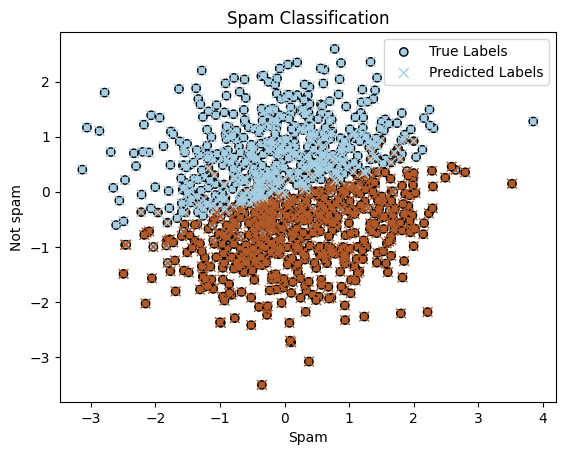

In [ ]:
# Plot the true labels and the predicted labels
plt.scatter(
    X[:, 1],
    X[:, 2],
    c=y_binary,
    cmap=plt.cm.Paired,
    edgecolors="k",
    marker="o",
    label="True Labels",
)
plt.scatter(
    X[:, 1],
    X[:, 2],
    c=y_pred_binary,
    cmap=plt.cm.Paired,
    marker="x",
    s=50,
    linewidth=1,
    edgecolors="k",
    label="Predicted Labels",
)
plt.xlabel("Spam")
plt.ylabel("Not spam")
plt.title("Spam Classification")
plt.legend()
plt.show()

In [ ]:
# confusion matrix
cm = np.zeros((2, 2))
for i in range(num_samples):
    if y_pred_binary[i] == 0 and y_binary[i] == 0:
        cm[0, 0] += 1
    elif y_pred_binary[i] == 0 and y_binary[i] == 1:
        cm[0, 1] += 1
    elif y_pred_binary[i] == 1 and y_binary[i] == 0:
        cm[1, 0] += 1
    elif y_pred_binary[i] == 1 and y_binary[i] == 1:
        cm[1, 1] += 1

cm

array([[428.,  72.],
       [ 72., 428.]])

In [ ]:
accuracy = np.diag(cm).sum() / np.sum(cm)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.60%


### Multi-class classifiers

In a multi-class classification problem, we have $K>2$ possible labels. This is sometimes referred to more compactly as $K$-class classification. (The case $K=2$ is Boolean classification, discussed above.) For our generic discussion of multi-class classifiers, we will encode the labels as $y=1,2, \ldots, K$. In some applications there are more natural encodings; for example, the Likert scale labels Strongly Disagree, Disagree, Neutral, Agree, and Strongly Agree are typically encoded as $-2$, $-1$, $0$, $1$, $2$, respectively.

A multi-class classifier is a function $\hat{f}: \mathbf{R}^n \rightarrow\{1, \ldots, K\}$. Given a feature vector $x, \hat{f}(x)$ (which is an integer between 1 and $K$ ) is our prediction of the associated outcome. A multi-class classifier classifies $n$-vectors into $K$ groups, corresponding to the values $1, \ldots, K$.

#### Examples

> Handwritten digit classification. We are given an image of a hand-written digit (and possibly other features generated from the images), and wish to guess which of ten digits it represents. This classifier is used to do automatic (computer-based) reading of handwritten digits.

> Marketing demographic classification. Data from purchases made, or web sites visited, is used to train a multi-class classifier for a set of market segments, such as college-educated women aged 25-30, men without college degrees aged 45-55, and so on. This classifier guesses the demographic segment of a new customer, based only on their purchase history. This can be used to select which promotions to offer a customer for whom we only have purchase data. The classifier is trained using data from known customers.

> Disease diagnosis. The labels are a set of diseases (including one label that corresponds to disease-free), and the features are medically relevant values, such as patient attributes and the results of tests. Such a classifier carries out diagnosis (of the diseases corresponding to the labels). The classifier is trained on cases in which a definitive diagnosis has been made.

> Translation word choice. A machine translation system translates a word in the source language to one of several possible words in the target language. The label corresponds to a particular choice of translation for the word in the source language. The features contain information about the context around the word, for example, words counts or occurrences in the same paragraph. As an example, the English word 'bank' might be translated into another language one way if the word 'river' appears nearby, and another way if 'financial' or 'reserves' appears nearby. The classifier is trained on data taken from translations carried out by (human) experts.

> Document topic prediction. Each example corresponds to a document or article, with the feature vector containing word counts or histograms, and the label corresponding to the topic or category, such as POLITICs, Sports, ENTERTAINMENT, and so on.

> Detection in communications. Many electronic communications systems transmit messages as a sequence of $K$ possible symbols. The vector $x$ contains measurements of the received signal. In this context the classifier $\hat{f}$ is called a detector or decoder; the goal is to correctly determine which of the $K$ symbols was transmitted.

## Iris flower classification

We illustrate least squares classification with a famous data set, first used in the 1930s by the statistician Ronald Fisher. The data are measurements of four attributes of three types of iris flowers: Iris Setosa, Iris Versicolour, and Iris Virginica. The data set contains 50 examples of each class. The four attributes are:
- $x_1$ is the sepal length in $\mathrm{cm}$,
- $x_2$ is the sepal width in $\mathrm{cm}$,
- $x_3$ is the petal length in $\mathrm{cm}$,
- $x_4$ is the petal width in $\mathrm{cm}$.

We compute a classifier that distinguishes the class Iris Virginica from the other two classes. Using the entire set of $150$ examples we find the coefficients.

In [ ]:
# @title iris data
irisD = {
    "virginica": np.array(
        [
            [6.3, 3.3, 6.0, 2.5],
            [5.8, 2.7, 5.1, 1.9],
            [7.1, 3.0, 5.9, 2.1],
            [6.3, 2.9, 5.6, 1.8],
            [6.5, 3.0, 5.8, 2.2],
            [7.6, 3.0, 6.6, 2.1],
            [4.9, 2.5, 4.5, 1.7],
            [7.3, 2.9, 6.3, 1.8],
            [6.7, 2.5, 5.8, 1.8],
            [7.2, 3.6, 6.1, 2.5],
            [6.5, 3.2, 5.1, 2.0],
            [6.4, 2.7, 5.3, 1.9],
            [6.8, 3.0, 5.5, 2.1],
            [5.7, 2.5, 5.0, 2.0],
            [5.8, 2.8, 5.1, 2.4],
            [6.4, 3.2, 5.3, 2.3],
            [6.5, 3.0, 5.5, 1.8],
            [7.7, 3.8, 6.7, 2.2],
            [7.7, 2.6, 6.9, 2.3],
            [6.0, 2.2, 5.0, 1.5],
            [6.9, 3.2, 5.7, 2.3],
            [5.6, 2.8, 4.9, 2.0],
            [7.7, 2.8, 6.7, 2.0],
            [6.3, 2.7, 4.9, 1.8],
            [6.7, 3.3, 5.7, 2.1],
            [7.2, 3.2, 6.0, 1.8],
            [6.2, 2.8, 4.8, 1.8],
            [6.1, 3.0, 4.9, 1.8],
            [6.4, 2.8, 5.6, 2.1],
            [7.2, 3.0, 5.8, 1.6],
            [7.4, 2.8, 6.1, 1.9],
            [7.9, 3.8, 6.4, 2.0],
            [6.4, 2.8, 5.6, 2.2],
            [6.3, 2.8, 5.1, 1.5],
            [6.1, 2.6, 5.6, 1.4],
            [7.7, 3.0, 6.1, 2.3],
            [6.3, 3.4, 5.6, 2.4],
            [6.4, 3.1, 5.5, 1.8],
            [6.0, 3.0, 4.8, 1.8],
            [6.9, 3.1, 5.4, 2.1],
            [6.7, 3.1, 5.6, 2.4],
            [6.9, 3.1, 5.1, 2.3],
            [5.8, 2.7, 5.1, 1.9],
            [6.8, 3.2, 5.9, 2.3],
            [6.7, 3.3, 5.7, 2.5],
            [6.7, 3.0, 5.2, 2.3],
            [6.3, 2.5, 5.0, 1.9],
            [6.5, 3.0, 5.2, 2.0],
            [6.2, 3.4, 5.4, 2.3],
            [5.9, 3.0, 5.1, 1.8],
        ]
    ),
    "setosa": np.array(
        [
            [5.1, 3.5, 1.4, 0.2],
            [4.9, 3.0, 1.4, 0.2],
            [4.7, 3.2, 1.3, 0.2],
            [4.6, 3.1, 1.5, 0.2],
            [5.0, 3.6, 1.4, 0.2],
            [5.4, 3.9, 1.7, 0.4],
            [4.6, 3.4, 1.4, 0.3],
            [5.0, 3.4, 1.5, 0.2],
            [4.4, 2.9, 1.4, 0.2],
            [4.9, 3.1, 1.5, 0.1],
            [5.4, 3.7, 1.5, 0.2],
            [4.8, 3.4, 1.6, 0.2],
            [4.8, 3.0, 1.4, 0.1],
            [4.3, 3.0, 1.1, 0.1],
            [5.8, 4.0, 1.2, 0.2],
            [5.7, 4.4, 1.5, 0.4],
            [5.4, 3.9, 1.3, 0.4],
            [5.1, 3.5, 1.4, 0.3],
            [5.7, 3.8, 1.7, 0.3],
            [5.1, 3.8, 1.5, 0.3],
            [5.4, 3.4, 1.7, 0.2],
            [5.1, 3.7, 1.5, 0.4],
            [4.6, 3.6, 1.0, 0.2],
            [5.1, 3.3, 1.7, 0.5],
            [4.8, 3.4, 1.9, 0.2],
            [5.0, 3.0, 1.6, 0.2],
            [5.0, 3.4, 1.6, 0.4],
            [5.2, 3.5, 1.5, 0.2],
            [5.2, 3.4, 1.4, 0.2],
            [4.7, 3.2, 1.6, 0.2],
            [4.8, 3.1, 1.6, 0.2],
            [5.4, 3.4, 1.5, 0.4],
            [5.2, 4.1, 1.5, 0.1],
            [5.5, 4.2, 1.4, 0.2],
            [4.9, 3.1, 1.5, 0.2],
            [5.0, 3.2, 1.2, 0.2],
            [5.5, 3.5, 1.3, 0.2],
            [4.9, 3.6, 1.4, 0.1],
            [4.4, 3.0, 1.3, 0.2],
            [5.1, 3.4, 1.5, 0.2],
            [5.0, 3.5, 1.3, 0.3],
            [4.5, 2.3, 1.3, 0.3],
            [4.4, 3.2, 1.3, 0.2],
            [5.0, 3.5, 1.6, 0.6],
            [5.1, 3.8, 1.9, 0.4],
            [4.8, 3.0, 1.4, 0.3],
            [5.1, 3.8, 1.6, 0.2],
            [4.6, 3.2, 1.4, 0.2],
            [5.3, 3.7, 1.5, 0.2],
            [5.0, 3.3, 1.4, 0.2],
        ]
    ),
    "versicolor": np.array(
        [
            [7.0, 3.2, 4.7, 1.4],
            [6.4, 3.2, 4.5, 1.5],
            [6.9, 3.1, 4.9, 1.5],
            [5.5, 2.3, 4.0, 1.3],
            [6.5, 2.8, 4.6, 1.5],
            [5.7, 2.8, 4.5, 1.3],
            [6.3, 3.3, 4.7, 1.6],
            [4.9, 2.4, 3.3, 1.0],
            [6.6, 2.9, 4.6, 1.3],
            [5.2, 2.7, 3.9, 1.4],
            [5.0, 2.0, 3.5, 1.0],
            [5.9, 3.0, 4.2, 1.5],
            [6.0, 2.2, 4.0, 1.0],
            [6.1, 2.9, 4.7, 1.4],
            [5.6, 2.9, 3.6, 1.3],
            [6.7, 3.1, 4.4, 1.4],
            [5.6, 3.0, 4.5, 1.5],
            [5.8, 2.7, 4.1, 1.0],
            [6.2, 2.2, 4.5, 1.5],
            [5.6, 2.5, 3.9, 1.1],
            [5.9, 3.2, 4.8, 1.8],
            [6.1, 2.8, 4.0, 1.3],
            [6.3, 2.5, 4.9, 1.5],
            [6.1, 2.8, 4.7, 1.2],
            [6.4, 2.9, 4.3, 1.3],
            [6.6, 3.0, 4.4, 1.4],
            [6.8, 2.8, 4.8, 1.4],
            [6.7, 3.0, 5.0, 1.7],
            [6.0, 2.9, 4.5, 1.5],
            [5.7, 2.6, 3.5, 1.0],
            [5.5, 2.4, 3.8, 1.1],
            [5.5, 2.4, 3.7, 1.0],
            [5.8, 2.7, 3.9, 1.2],
            [6.0, 2.7, 5.1, 1.6],
            [5.4, 3.0, 4.5, 1.5],
            [6.0, 3.4, 4.5, 1.6],
            [6.7, 3.1, 4.7, 1.5],
            [6.3, 2.3, 4.4, 1.3],
            [5.6, 3.0, 4.1, 1.3],
            [5.5, 2.5, 4.0, 1.3],
            [5.5, 2.6, 4.4, 1.2],
            [6.1, 3.0, 4.6, 1.4],
            [5.8, 2.6, 4.0, 1.2],
            [5.0, 2.3, 3.3, 1.0],
            [5.6, 2.7, 4.2, 1.3],
            [5.7, 3.0, 4.2, 1.2],
            [5.7, 2.9, 4.2, 1.3],
            [6.2, 2.9, 4.3, 1.3],
            [5.1, 2.5, 3.0, 1.1],
            [5.7, 2.8, 4.1, 1.3],
        ]
    ),
}

In [ ]:
classes = {"virginica": 0, "setosa": 1, "versicolor": 2}

data = np.concatenate(
    [irisD["virginica"], irisD["setosa"], irisD["versicolor"]], axis=0
)

labels = np.concatenate(
    [
        np.full(len(irisD["virginica"]), classes["virginica"]),
        np.full(len(irisD["setosa"]), classes["setosa"]),
        np.full(len(irisD["versicolor"]), classes["versicolor"]),
    ],
    axis=0,
)

encoded_labels = np.zeros((labels.shape[0], 3))
encoded_labels[np.arange(labels.shape[0]), labels] = 1

In [ ]:
def train_test_split(data, labels, test_ratio=0.2, random_seed=None):
    np.random.seed(random_seed)
    idx = np.arange(data.shape[0])
    np.random.shuffle(idx)

    split_idx = int((1 - test_ratio) * len(data))

    train_data, test_data = data[idx[:split_idx]], data[idx[split_idx:]]
    train_labels, test_labels = labels[idx[:split_idx]], labels[idx[split_idx:]]
    return train_data, train_labels, test_data, test_labels

In [ ]:
train_data, train_labels, test_data, test_labels = train_test_split(
    data, encoded_labels, test_ratio=0.2, random_seed=44
)

In [ ]:
def least_squares_classifier(X_train, y_train):
    X_train_augmented = np.concatenate(
        (np.ones((X_train.shape[0], 1)), X_train), axis=1
    )
    w = np.linalg.lstsq(X_train_augmented, y_train, rcond=None)[0]
    return w

In [ ]:
def predict(X_test, w):
    X_test_augmented = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
    y_pred = X_test_augmented @ w
    return np.argmax(y_pred, axis=1).astype(int)

In [ ]:
def generate_confusion_matrix(y_true, y_pred, num_classes):
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1
    return conf_matrix

In [ ]:
weights = least_squares_classifier(train_data, train_labels)
y_pred = predict(test_data, weights)
y_true = np.argmax(test_labels, axis=1)
conf_matrix = generate_confusion_matrix(y_true, y_pred, num_classes=3)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 5  0  0]
 [ 0 12  0]
 [ 6  0  7]]


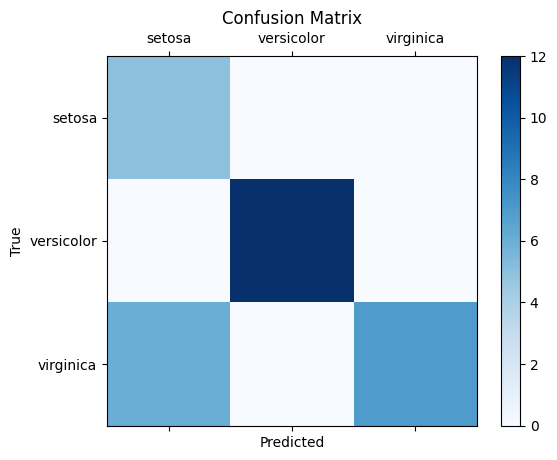

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cm = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar(cm)
plt.xticks(np.arange(3), ["setosa", "versicolor", "virginica"])
plt.yticks(np.arange(3), ["setosa", "versicolor", "virginica"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
def k_fold_cross_validation_splitter(data, labels, k=5, shuffle=True, random_seed=0):
    if shuffle:
        np.random.seed(random_seed)
        indices = np.random.permutation(len(data))
        data = data[indices]
        labels = labels[indices]

    fold_size = len(data) // k
    remainder = len(data) % k

    folds = []
    start_idx = 0

    for i in range(k):
        end_idx = start_idx + fold_size + (1 if i < remainder else 0)

        test_data = data[start_idx:end_idx]
        test_labels = labels[start_idx:end_idx]

        train_data = np.concatenate([data[:start_idx], data[end_idx:]])
        train_labels = np.concatenate([labels[:start_idx], labels[end_idx:]])

        folds.append((train_data, train_labels, test_data, test_labels))
        start_idx = end_idx

    return folds


folds = k_fold_cross_validation_splitter(data, encoded_labels, k=5)

for train_data, train_labels, test_data, test_labels in folds:
    print("Train data shape:", train_data.shape)
    print("Train labels shape:", train_labels.shape)
    print("Test data shape:", test_data.shape)
    print("Test labels shape:", test_labels.shape)
    print()

Train data shape: (120, 4)
Train labels shape: (120, 3)
Test data shape: (30, 4)
Test labels shape: (30, 3)

Train data shape: (120, 4)
Train labels shape: (120, 3)
Test data shape: (30, 4)
Test labels shape: (30, 3)

Train data shape: (120, 4)
Train labels shape: (120, 3)
Test data shape: (30, 4)
Test labels shape: (30, 3)

Train data shape: (120, 4)
Train labels shape: (120, 3)
Test data shape: (30, 4)
Test labels shape: (30, 3)

Train data shape: (120, 4)
Train labels shape: (120, 3)
Test data shape: (30, 4)
Test labels shape: (30, 3)



In [ ]:
accuracy_list = []
for i, fold in enumerate(folds):
    train_data, train_labels, test_data, test_labels = fold
    weights = least_squares_classifier(train_data, train_labels)
    y_pred = predict(test_data, weights)
    y_true = np.argmax(test_labels, axis=1)
    print("Confusion Matrix:")
    cm = generate_confusion_matrix(y_true, y_pred, num_classes=3)
    print(cm)
    accuracy = np.diag(cm).sum() / np.sum(cm)
    accuracy_list.append(accuracy)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print()

Confusion Matrix:
[[ 7  0  4]
 [ 0 13  0]
 [ 2  0  4]]
Accuracy: 80.00%

Confusion Matrix:
[[ 5  0  0]
 [ 0 10  0]
 [ 7  0  8]]
Accuracy: 76.67%

Confusion Matrix:
[[9 0 1]
 [0 9 1]
 [6 0 4]]
Accuracy: 73.33%

Confusion Matrix:
[[13  0  1]
 [ 0  6  0]
 [ 0  0 10]]
Accuracy: 96.67%

Confusion Matrix:
[[ 8  0  2]
 [ 0 11  0]
 [ 2  0  7]]
Accuracy: 86.67%



In [ ]:
rms = np.sqrt(np.mean(np.array(accuracy_list) ** 2))
print(f"Mean accuracy of folds: {rms * 100:.2f}%")

Mean accuracy of folds: 83.08%
